In [12]:
import gzip
import shutil
with gzip.open('wiki-Vote.txt.gz', 'rb') as f_in:
    with open('wiki-Vote.txt', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [13]:
lines = []
with open(r"wiki-Vote.txt", 'r') as fp:
    lines = fp.readlines()

with open(r"wiki-Vote.txt", 'w') as fp:
    for number, line in enumerate(lines):
        if number not in [0,1,2,3]:
            fp.write(line)

In [14]:
import networkx as nx
import numpy as np


G = nx.Graph()
with open('wiki-Vote.txt', "r") as file:
    lines = file.readlines()
    for line in lines:
        values = line.strip().split()

        G.add_edges_from([(values[0],
                           values[1])])


In [15]:
A = nx.adjacency_matrix(G)
D = np.diag([d for n, d in G.degree()])
L = D - A
L

matrix([[ 28,  -1,  -1, ...,   0,   0,   0],
        [ -1,  29,   0, ...,   0,   0,   0],
        [ -1,   0, 477, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   1,   0,   0],
        [  0,   0,   0, ...,   0,   2,   0],
        [  0,   0,   0, ...,   0,   0,   1]], dtype=int64)

In [43]:
A [30,1412]

0

In [16]:
import numpy.linalg
val, Vec = np.linalg.eig(L)

In [17]:
indices = np.argsort(val)
sorted_eigenvalues = val[indices]
sorted_eigenvectors = Vec[:,indices]

In [18]:
l = sorted_eigenvectors[1]
X = sorted_eigenvectors[:,1]
X

matrix([[0.00026776+0.j],
        [0.00026776+0.j],
        [0.00026776+0.j],
        ...,
        [0.00026776+0.j],
        [0.00026776+0.j],
        [0.00026776+0.j]])

In [19]:
X = np.real(np.array(X))
X

array([[0.00026776],
       [0.00026776],
       [0.00026776],
       ...,
       [0.00026776],
       [0.00026776],
       [0.00026776]])

In [20]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Elbow curve')

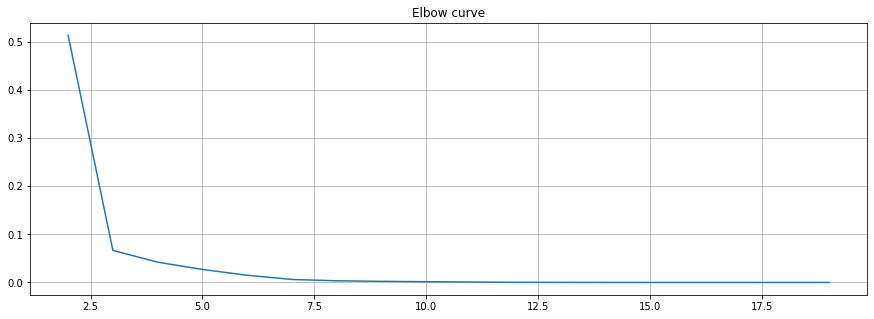

In [21]:
scores = []

for i in range(2, 20):
  model = KMeans(n_clusters=i).fit(X)
  scores.append(model.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), scores)
plt.grid(True)
plt.title('Elbow curve')

In [22]:
k = 3
kmeanModel = KMeans(n_clusters=k).fit(X)
kmeanModel.fit(X)
Y_pred = kmeanModel.predict(X)

In [23]:
print(Y_pred[0])

0


In [25]:
real_node_ids = list(G.nodes())

In [26]:
print('cluster 1: ')
for i in range(len(Y_pred)):
  if Y_pred[i] == 1:
    print(real_node_ids[i], ':', Y_pred[i])

cluster 1: 
3194 : 1
3195 : 1
3244 : 1
3245 : 1
6258 : 1
6259 : 1


In [ ]:
print('cluster 2: ')
for i in range(len(Y_pred)):
  if Y_pred[i] == 2:
    print(real_node_ids[i], ':', Y_pred[i])

In [28]:
#@title idx
real_node_ids = list(G.nodes())
for i in range(len(Y_pred)):
  print(real_node_ids[i], ':', Y_pred[i])

Streaming output truncated to the last 5000 lines.
461 : 0
462 : 0
463 : 0
3939 : 0
3942 : 0
467 : 0
468 : 0
164 : 0
472 : 0
476 : 0
479 : 0
480 : 0
481 : 0
486 : 0
473 : 0
489 : 0
490 : 0
492 : 0
493 : 0
494 : 0
497 : 0
498 : 0
499 : 0
501 : 0
502 : 0
504 : 0
507 : 0
513 : 0
511 : 0
509 : 0
516 : 0
519 : 0
520 : 0
525 : 0
521 : 0
522 : 0
523 : 0
445 : 0
527 : 0
528 : 0
531 : 0
530 : 0
529 : 0
534 : 0
536 : 0
539 : 0
540 : 0
541 : 0
542 : 0
543 : 0
544 : 0
7646 : 0
546 : 0
3811 : 0
4199 : 0
5298 : 0
5807 : 0
6421 : 0
6590 : 0
551 : 0
218 : 0
547 : 0
548 : 0
550 : 0
552 : 0
553 : 0
554 : 0
555 : 0
556 : 0
557 : 0
558 : 0
561 : 0
562 : 0
563 : 0
565 : 0
568 : 0
569 : 0
570 : 0
571 : 0
572 : 0
573 : 0
574 : 0
576 : 0
577 : 0
578 : 0
580 : 0
2258 : 0
5103 : 0
5500 : 0
583 : 0
582 : 0
4562 : 0
4605 : 0
4728 : 0
585 : 0
588 : 0
591 : 0
595 : 0
593 : 0
596 : 0
594 : 0
597 : 0
598 : 0
599 : 0
6892 : 0
7912 : 0
602 : 0
605 : 0
610 : 0
612 : 0
614 : 0
615 : 0
495 : 0
620 : 0
8289 : 0
621 : 0
625

In [29]:
#@title Min Cut
from itertools import combinations

sub_graphs = []
end_cut = 0
for i in range(3):
  vtx = list(map(lambda x: np.array(G.nodes)[x], np.where(Y_pred==i)[0]))
  sub_graphs.append(G.subgraph(vtx))

for g1, g2 in combinations(sub_graphs, 2):
  cut = 0
  for i in g1.nodes():
    for j in g2.nodes():
      if G.has_edge(i, j):
        cut += 1
  print(cut)
  end_cut +=cut

print("cut metric is : ", end_cut)

0
0
0
cut metric is :  0


In [61]:
#@title Modularity
res = 0
m = G.number_of_edges()
for i in range(3):
  vtx = list(map(lambda x: np.array(G.nodes)[x], np.where(Y_pred==i)[0]))
  sub_G = G.subgraph(vtx)
  for i in sub_G.nodes():
    for j in sub_G.nodes():
      # A_ij - (K_i * K_j / 2m)
      fpart = 1 if sub_G.has_edge(i, j) else 0
      spart = G.degree(i) * G.degree(j) / (2 * m)
      res += fpart - spart
print(f'Modularity = {res/(2 * m)}')

Modularity = 0.00015878036771297326


In [47]:
import networkx.algorithms.community as nx_comm
nx_comm.modularity(G, [list(map(lambda x: np.array(G.nodes)[x], np.where(Y_pred==0)[0])), 
                       list(map(lambda x: np.array(G.nodes)[x], np.where(Y_pred==1)[0])), 
                       list(map(lambda x: np.array(G.nodes)[x], np.where(Y_pred==2)[0]))])


0.00015878036770928654